<div class="alert alert-block alert-info">
__13.5/14__ Ananya Sriram

See comments below.

# Donovan Feist

# CH EN 3603

# Homework 8

# Problem 2

Calculate the bubble-point temperature and the composition of the first vapor bubble of an equimolar mixture of
ethylene, n-butane, iso-pentane and n-hexane at 4 atm using
1. The DePriester correlation
2. Raoult’s law
3. The Redlich-Kwong equation of state
4. The Soave-Redlich-Kwong equation of state.

Feel free to use the python files I posted on the class web page for this, as it will save you a lot of time - particularly for the RK/SRK equation of state.

Provide a table that summarizes the bubble point temperature and the composition of the corresponding vapor
phase for each method. Be sure to include a description of the equations you solve and the parameters you use in
those equations. For the SRK equation, you can refer to the appropriate sections in the book or lecture notes so
that you don’t need to re-hash all of those equations. Include an algorithm for how you use the SRK equation to
obtain the bubble point.

# Solution

## Part 1 dePriester correlation

Starting with equation for $y_i$ (from slideshow 7 slide 16)

## $y_i=\frac{K_iz_i}{1+(K_i-1)\frac{V}{F}}$

Because we're looking for the bubble-point temperature and the composition of the first vapor bubble, $\frac{V}{F}=0 \Rightarrow$

## $y_i=K_iz_i$

## $\sum y_i=\sum K_iz_i=1$

In [1]:
#imports
import numpy as np
from scipy.optimize import fsolve

#given values
z=np.array([0.25,0.25,0.25,0.25]) #composition of mixture
p=4*14.6959 #psia (first number is in atmospheres, second number converts the pressure to psia)

#defining dePriester correlation (credit to James C. Sutherland)
def depriester(coefs, T, p ):
    # K = depreiester( coefs, T, p )
    #
    # Calculates K-values using the depriester charts
    #
    # INPUTS:
    #   coefs - the Depriester correlation coefficients, with each coefficient
    #           in a column and each species in a row.
    #   T     - temperature (Rankine)
    #   p     - pressure (psia)
    #
    # OUTPUT:
    #   K - the K-values
    #
    # Author: James C. Sutherland

    ns,nc = coefs.shape
    assert( nc==6 )  # 6 coefficients are required for depriester

    K = np.exp( coefs[:,0]/T**2 + coefs[:,1]/T + coefs[:,2] + coefs[:,3]*np.log(p) + coefs[:,4]/p**2 + coefs[:,5]/p )

    return K

#dePriester coefficients
ethylene=np.array([-600076.875,0,7.90595,-0.84677,42.94594,0])
nbutane=np.array([-1280557,0,7.94986,-0.96455,0,0])
isopentane=np.array([-1481583,0,7.58071,-0.93159,0,0])
nhexane=np.array([-1778901,0,6.96783,-0.84634,0,0])
coefs=np.array([ethylene,
                nbutane,
                isopentane,
                nhexane])

#creating function to find the roots of
def func(T):
    K=depriester(coefs,T,p)
    i=0
    sum=0
    for i in range(0,len(K-1)):
        sum+=K[i]*z[i]
    r=1-sum
    return r

sol=fsolve(func,400)
print(sol,'R')
print(0.555556*sol,'K')
K=depriester(coefs,sol,p)
y=np.zeros(4)
i=0
for i in range(0,len(K-1)):
    y[i]=K[i]*z[i]
    i+=1
print('moles fractions=',y)

[439.46527745] R
[244.14757168] K
moles fractions= [9.75642468e-01 1.83811006e-02 5.13233993e-03 8.44091414e-04]


The bubble-point temperature is $\boxed{244.1 \space\space K}$

The composition of the first vapor bubble is

$\boxed{y_{ethylene}=0.976\\y_{n-butane}=0.0184\\y_{isopentane}=0.00513\\y_{n-hexane}=0.000844}$

## Part 2 Raoult's Law

Starting with equation for $y_i$ (from slideshow 7 slide 16)

## $y_i=\frac{K_iz_i}{1+(K_i-1)\frac{V}{F}}$

Because we're looking for the bubble-point temperature and the composition of the first vapor bubble, $\frac{V}{F}=0 \Rightarrow$

## $y_i=K_iz_i$

## $\sum y_i=\sum K_iz_i=1$

For ethylene
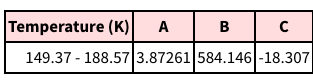
For n-butane
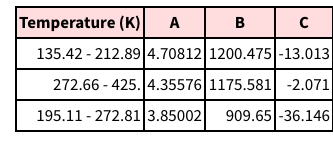
For isopentane
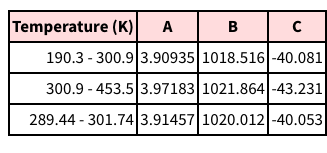
For n-hexane
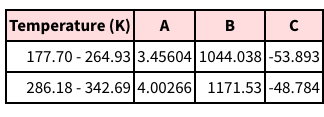

In [2]:
#imports
import numpy as np
from scipy.optimize import fsolve

#Antoine equation parameters (T in K, Ps in bar)
ethylene=np.array([3.87261,584.146,-18.307]) #T in K, P in bar; source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C74851&Units=SI&Mask=4#Thermo-Phase
nbutane=np.array([3.85002,909.65,-36.146]) #T in K, P in bar; source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C106978&Units=SI&Mask=4#Thermo-Phase
isopentane=np.array([3.90935,1018.516,-40.081]) #T in K, P in bar; source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C78784&Units=SI&Mask=4#Thermo-Phase
nhexane=np.array([3.45604,1044.038,-53.893]) #T in K, P in bar; source: https://webbook.nist.gov/cgi/cbook.cgi?ID=C110543&Units=SI&Mask=4#Thermo-Phase

#grouping all Antoine parameters into a single matrix
a=np.array([ethylene,
            nbutane,
            isopentane,
            nhexane])

#given values
z=np.array([0.25,0.25,0.25,0.25]) #composition of mixture
P=4*101325 #Pa (first number is pressure in atm, second number converts pressure into Pa)

#creating function for Antoine correlation
def Antoine(a,T):
    #T in K
    #a constants are for T in K and Ps in bar
    Ps=10.0**(a[:,0]-a[:,1]/(a[:,2]+T)) #bar
    Ps=Ps*100000 #Pa
    return Ps

#creating function for Raoult's Law
def raoults_law_kvalue(T,P,a):
    K=np.zeros(len(z))
    Ps=Antoine(a,T)
    K=Ps/P
    return K

#creating function to find the roots of
def function(T):
    K=raoults_law_kvalue(T,P,a)
    i=0
    sum=0
    for i in range(0,len(K-1)):
        sum+=K[i]*z[i]
    r=1-sum
    return r

#finding the roots of function
sol=fsolve(function,235)
print(sol,'K')

#calculating K values based of of temperature found with fsolve
K=raoults_law_kvalue(sol,P,a)

#calculating moles fractions in first vapor bubble
y=np.zeros(4)
i=0
for i in range(0,len(K-1)):
    y[i]=K[i]*z[i]
    i+=1
print('moles fractions=',y)

[237.0807383] K
moles fractions= [9.83289595e-01 1.29745300e-02 3.38356526e-03 3.52309674e-04]


The bubble-point temperature is $\boxed{237.1 \space\space K}$

The composition of the first vapor bubble is

$\boxed{y_{ethylene}=0.983\\y_{n-butane}=0.0130\\y_{isopentane}=0.00338\\y_{n-hexane}=0.000352}$

## Part 3 Redlich-Kwong equation of state

Starting with equation for $y_i$ (from slideshow 7 slide 16)

## $y_i=\frac{K_iz_i}{1+(K_i-1)\frac{V}{F}}$

Because we're looking for the bubble-point temperature and the composition of the first vapor bubble, $\frac{V}{F}=0 \Rightarrow$

## $y_i=K_iz_i$

## $\sum y_i=\sum K_iz_i=1$

In [4]:
#imports
import numpy as np
from scipy.optimize import fsolve
from warnings import warn

#given values
z=np.array([0.25,0.25,0.25,0.25]) #composition of mixture
p=4*101325 #Pa (first number is in atmospheres, second number converts the pressure to Pa)

#defining Redlich-Kwong equation of state (credit to James C. Sutherland)
def redlich_kwong_kvalue( Tc, Pc, T, P, x, y, *acentric ):
    #---------------------------------------------
    # K = redlich_kwong_kvalue( Tc, Pc, T, P, x, y )
    # K = redlich_kwong_kvalue( Tc, Pc, T, P, x, y, w )
    #
    # INPUTS:
    #  Tc - vector of critical temperatures (K) for each species
    #  Pc - vector of critical pressure (Pa) for each species
    #  T  - temperature (K)
    #  P  - pressure (Pa)
    #  x  - liquid phase mole fractions
    #  y  - vapor  phase mole fractions
    #  w  - accentric factor (OPTIONAL). If provided, Soave-Redlich-Kwong is used.  Otherwise, Redlich-Kwong is used.
    #
    # OUTPUT:
    #  K - vector of equilibrium coefficients (K values)
    #
    # Author: James C. Sutherland
    #---------------------------------------------

    R = 8.3144  # Gas constant, (m ^ 3 Pa) / (mol K)

    #---------------------------------------------
    # Set the species parameters, ai, bi, Ai, Bi
    if acentric:
      # we have the accentric factor, so use it in determining the parameters
      # for the EOS (Soave-Redlich-Kwong)
      w = acentric[0];
      f  = 0.48 + 1.574*w - 0.176*w**2
      Tr = T/Tc
      a  = 0.42748 * R**2 * Tc**2 *(1+f*(1-np.sqrt(Tr)))**2 / Pc  # Pa-m^6/mol^2
    else:
      # we don't have the accentric factor, so revert to the Redlich-Kwong EOS
      a = 0.42748 * R**2 * Tc**2.5/(Pc*T**0.5)  # Pa-m^6/mol^2

    b = 0.08664 * R * Tc/Pc  # m^3/mol
    A = a*P/(R*T)**2          # no units
    B = b*P/(R*T)             # no units
    #---------------------------------------------

    #---------------------------------------------
    # Mixing rules to get mixture parameters for the vapor and liquid phases.
    # it is important that the x, y, and a vectors are row vectors here so that
    # we can use "sum" properly.
    amixV = sum(sum( np.outer(y,y) * np.sqrt( np.outer(a,a) ) ))
    bmixV = sum(y*b)
    AmixV = amixV*P/(R*T)**2
    BmixV = bmixV*P/(R*T)

    amixL = sum(sum( ( np.outer(x,x) * np.sqrt( np.outer(a,a) ) ) ))
    bmixL = sum(x*b)
    AmixL = amixL*P/(R*T)**2
    BmixL = bmixL*P/(R*T)
    #---------------------------------------------

    #---------------------------------------------
    # calculate the compressibility factor for the vapor and liquid phases
    # from the Redlich-Kwong equation of state.
    # Put this in polynomial form to get all of the roots of the polynomial.
    vcoefs = np.array([1, -1, (AmixV-BmixV-BmixV**2), -(AmixV*BmixV)])
    lcoefs = np.array([1, -1, (AmixL-BmixL-BmixL**2), -(AmixL*BmixL)])
    ZL = min(np.roots(lcoefs))  # liquid Z value
    ZV = max(np.roots(vcoefs))  # vapor  Z value

    if abs( ZL - ZV ) < 1e-4:
      warn('It appears that the mixture is above its critical point!')
    #---------------------------------------------


    #---------------------------------------------
    # calculate partial molar fugacity coefficients and then the K values
    phiV = np.exp( (ZV-1)*B/BmixV - np.log(ZV-BmixV) - AmixV/BmixV*(2*np.sqrt(A/AmixV) - B/BmixV) * np.log(1+BmixV/ZV) )
    phiL = np.exp( (ZL-1)*B/BmixL - np.log(ZL-BmixL) - AmixL/BmixL*(2*np.sqrt(A/AmixL) - B/BmixL) * np.log(1+BmixL/ZL) )

    K = phiL/phiV
    #---------------------------------------------

    return K

#constant values needed for the RK equation
Tc=np.array([282.5,425,461,507.6]) #K (order: ethylene, n-butane, isopentane, n-hexane) (sources: same as Antoine constants)
Pc=100000*np.array([50.6,38.0,33.8,30.2]) #Pa (values in arrar are in bar, 100000 converts the pressure to Pa) (order: ethylene, n-butane, isopentane, n-hexane) (sources: same as Antoine constants)
yguess=np.array([9.75642468e-01, 1.83811006e-02, 5.13233993e-03, 8.44091414e-04])

#creating function to find the roots of
def fun(T):
    K=redlich_kwong_kvalue(Tc,Pc,T,p,z,yguess)
    i=0
    sum=0
    for i in range(0,len(K-1)):
        sum+=K[i]*z[i]
    r=1-sum
    return r


sol=fsolve(fun,400)
print(sol,'K')
K=redlich_kwong_kvalue(Tc,Pc,sol,p,z,yguess)
y=np.zeros(4)
i=0
for i in range(0,len(K-1)):
    y[i]=K[i]*z[i]
    i+=1
print(y)

[239.40405929] K
[0.96057315 0.02766591 0.00946745 0.0022935 ]


The bubble-point temperature is $\boxed{239.4 \space\space K}$

The composition of the first vapor bubble is

$\boxed{y_{ethylene}=0.961\\y_{n-butane}=0.0277\\y_{isopentane}=0.00947\\y_{n-hexane}=0.00229}$

## Part 4 Soave-Redlich-Kwong equation of state

Starting with equation for $y_i$ (from slideshow 7 slide 16)

## $y_i=\frac{K_iz_i}{1+(K_i-1)\frac{V}{F}}$

Because we're looking for the bubble-point temperature and the composition of the first vapor bubble, $\frac{V}{F}=0 \Rightarrow$

## $y_i=K_iz_i$

## $\sum y_i=\sum K_iz_i=1$

The "redlich_kwong_kvalue" function as defined above will be used here too, except this time an accentric factor is used as well.

In [5]:
#constant values needed for the SRK equation
Tc=np.array([282.5,425,461,507.6]) #K (order: ethylene, n-butane, isopentane, n-hexane) (sources: same as Antoine constants)
Pc=100000*np.array([50.6,38.0,33.8,30.2]) #Pa (values in arrar are in bar, 100000 converts the pressure to Pa) (order: ethylene, n-butane, isopentane, n-hexane) (sources: same as Antoine constants)
yguess=np.array([9.75642468e-01, 1.83811006e-02, 5.13233993e-03, 8.44091414e-04])
w=np.array([0.085,0.193,0.228,0.305]) #source: "Preos" excel workbook downloaded for CH EN 3853 (Thermodynamics 2)

#creating function to find the roots of
def fun(T):
    K=redlich_kwong_kvalue(Tc,Pc,T,p,z,yguess,w)
    i=0
    sum=0
    for i in range(0,len(K-1)):
        sum+=K[i]*z[i]
    r=1-sum
    return r

sol=fsolve(fun,400)
print(sol,'K')
K=redlich_kwong_kvalue(Tc,Pc,sol,p,z,yguess,w)
y=np.zeros(4)
i=0
for i in range(0,len(K-1)):
    y[i]=K[i]*z[i]
    i+=1
print(y)

[240.06911348] K
[9.77076782e-01 1.76561231e-02 4.68848707e-03 5.78608039e-04]


The bubble-point temperature is $\boxed{240.1 \space\space K}$

The composition of the first vapor bubble is

$\boxed{y_{ethylene}=0.977\\y_{n-butane}=0.0177\\y_{isopentane}=0.00469\\y_{n-hexane}=0.000579}$

## Table to Summarize Data

| Method                                | T_bub (K) | y_ethylene | y_n-butane | y_isopentane | y_n-hexane | equations solved                                   | parameters                                                                                                                        |
|---------------------------------------|-----------|------------|------------|--------------|------------|----------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------|
| dePriester correlation                | 244.1     | 0.976      | 0.0184     | 0.00513      | 0.000844   | dePriester correlation; sum(Ki*zi)=1               | the dePriester coefficients for each species are needed for this method                                                           |
| Raoult's law                          | 237.1     | 0.983      | 0.0130     | 0.00338      | 0.000352   | Antoine equation; ideal Raoult's law; sum(Ki*zi)=1 | the Antoine equation parameters for each species are needed for this method in order to get the vapor pressure for each species   |
| Redlich-Kwong equation of state       | 239.4     | 0.961      | 0.0277     | 0.00947      | 0.00229    | equations on pg. 24-25 (4th ed); sum(Ki*zi)=1      | the critical temperature, Tc, and critical pressure, Pc, for each species are needed for this method                              |
| Soave-Redlich-Kwong equation of state | 240.1     | 0.977      | 0.0177     | 0.00469      | 0.000579   | equations on pg. 24-25 (4th ed); sum(Ki*zi)=1      | the critical temperature, Tc, and critical pressure, Pc, and the accentric factor, w, for each species are needed for this method |

<font color="red">
Need more explanation on algorithm used for parts 3 and 4.